# Project 10: Linear Algebra
---
---

## Project Task:

- The Sure Tomorrow insurance company wants to protect its clients' data. Your task is to develop a data transforming algorithm that would make it hard to recover personal information from the transformed data. This is called data masking, or data obfuscation. You are also expected to prove that the algorithm works correctly. Additionally, the data should be protected in such a way that the quality of machine learning models doesn't suffer. You don't need to pick the best model.
- Follow these steps to develop a new algorithm:
    - construct a theoretical proof using properties of models and the given task;
    - formulate an algorithm for this proof;
    - check that the algorithm is working correctly when applied to real data.


## Project Instructions:

- Look into and preprocess the data.
- Provide a theoretical proof based on the equation of linear regression.
    - The features are multiplied by an invertible matrix. Show that the quality of the model is the same for both sets of parameters: the original features and the features after multiplication.
    - How are the weight vectors from MSE minimums for these models related?
- State an algorithm for data transformation to solve the task. Explain why the linear regression quality won't change based on the proof above.
- Program your algorithm using matrix operations. Make sure that the quality of linear regression from sklearn is the same before and after transformation. Use the R2 metric.

## The Data:
- Insurance Data in the US
- Each row is a single record for a person on insurance
- Columns:
    - Features: insured person's gender, age, salary, and number of family members.
    - Target: number of insurance benefits received by the insured person over the last five years.

---

In [1]:
# Library Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## 1) Look into and Preprocess the Data:
---

In [2]:
# Import data to a pandas dataframe

# Local Path
#df = pd.read_csv('insurance_us.csv')

# Practicum JupyterHub Path
df = pd.read_csv('/datasets/insurance_us.csv')
df.head()

,Gender,Age,Salary,Family members,Insurance benefits
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [3]:
df.columns = ['gender', 'age', 'salary', 'family_members', 'insurance_benefits']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
gender                5000 non-null int64
age                   5000 non-null float64
salary                5000 non-null float64
family_members        5000 non-null int64
insurance_benefits    5000 non-null int64
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
df.duplicated().sum()

153

In [6]:
df.describe()

,gender,age,salary,family_members,insurance_benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


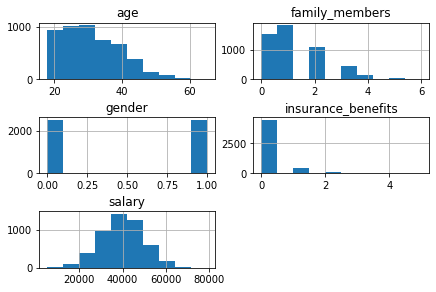

In [7]:
df.hist()
plt.tight_layout(pad=0.5)

In [8]:
df['age'].min()

18.0

- Looking at the data:
    - We find no null or missing values
    - Each series has a proper data type
    - Nothing abnormal about the distributions
        - Age has a strong right tail
        - Salary is quite normal looking
        - Gender is binary
        - family_member and insurance_benefits are somewhat similar looking but the first has a stronger tail while the latter is heavily favored over 0

## 2) Provide a theoretical proof based on the equation of linear regression.
- The features are multiplied by an invertible matrix.
- Show that the quality of the model is the same for both sets of parameters: the original features and the features after multiplication.
- How are the weight vectors from MSE minimums for these models related?
---

**Theoretical Proof:**
- Linear regression equation --> y = wx + $w_{0}$
- We want to find a prediction vector (a) so we take the training features (X) and get --> a = Xw + $w_{0}$
- By creating columnb zero in matrix X and setting it to all 1's we can multiply it by the w vector to get --> a = Xw
- Now we can find the w vector that minimizes MSE with --> w = argmin MSE(Xw, y), where y is the target vector
- This is also completed with the formula --> w = $($X^{T}$X)^{-1}$$X^{T}$y

- With the inverted random matrix as the key, it is multiplied with the original feature set to to create new features.
- With a different feature set that was changed with the inverted matrix, the formula is used to minimize MSE and get the same result based on new weight vectors

In [9]:
features = df.drop('insurance_benefits', axis=1)
target = df['insurance_benefits']

# invertible matrix to multiply by features
rand_matrix = np.random.normal(size=(4,4))
rand_m_inv = np.linalg.inv(rand_matrix)

# matrix multiplication between original features and random inverted matrix
new_features = features @ rand_m_inv
new_features.head()

,0,1,2,3
0,-22222.379666,27153.853364,5329.791264,23965.204681
1,-17047.881538,20820.256106,4080.156869,18360.027364
2,-9424.382291,11508.276917,2252.440093,10146.108076
3,-18668.988600,22817.703122,4488.575274,20148.819235
4,-11700.267417,14294.040378,2800.911578,12610.416497


#### Linear Regression Model:

In [10]:
# splitting data for training and testing for each set
xtrain, xval, ytrain, yval = train_test_split(features, target, test_size=0.2, random_state=1)

x1_train, x1_val, y1_train, y1_val = train_test_split(new_features, target, test_size=0.2, random_state=1)


In [11]:
model = LinearRegression()
model.fit(xtrain, ytrain)
preds = model.predict(xval)
score = r2_score(yval, preds)
mse = mean_squared_error(yval, preds)
print('Original Data R2 Score:', score)
print('MSE:', mse)

Original Data R2 Score: 0.36249729353277194
MSE: 0.1086043235710505


In [12]:
model_1 = LinearRegression()
model_1.fit(x1_train, y1_train)
preds_1 = model_1.predict(x1_val)
score_1 = r2_score(y1_val, preds_1)
mse_1 = mean_squared_error(y1_val, preds_1)
print('Multiplied Data R2 Score:', score_1)
print('MSE:', mse_1)

Multiplied Data R2 Score: 0.3624972935327553
MSE: 0.10860432357105333


**Similarity of Models with different Features**
- Based on training and running a Linear Regression model on both the original data and the transformed data:
    - Both sets score the exact same in R2 score up to the 11th decimal place
    - Both sets score the exact same MSE up to the 12th decimal place

In [13]:
X = features
y = target
w = np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y)

X1 = new_features
w1 = np.linalg.inv((X1.T.dot(X1))).dot(X1.T).dot(y)

print('Original Feature Weights:', w)
print('New Feature Weights:', w1)
print('-----')
print('Difference between weights:', w1-w)

Original Feature Weights: [-4.43854686e-02  2.33356224e-02 -1.17739038e-05 -4.55168125e-02]
New Feature Weights: [-0.06548293 -0.0714228  -0.0309316   0.02709593]
-----
Difference between weights: [-0.02109746 -0.09475842 -0.03091983  0.07261274]


**Comparing weights of the two feature sets**
- Using the formula to calculate the weight vectors from MSE minimums:
    - We see slight differences between the two weight vectors
    - For the transformed data vs the original:
        - The gender column is weighted more
        - The age column is weighted less
        - The salary column is weighted less
        - The family_member column is weighted more
    - The two feature sets score the same R2 and MSE with slightly different vectors because the feature values are different

## 3) State an algorithm for data transformation to solve the task. 
- Explain why the linear regression quality won't change based on the proof above.
---

- The way we can transform data is by creating a random square matrix where both the numbers and rows are equal to the number of columns in the original feature set
- We can then invert the randomly created matrix and multiply it by the original matrix to create a new masked feature set
    - This feature set completely changes each number so we do not know the actual values of gender, age, salary, or number of family members
- We can then train and test our Linear Regression model on the new features without revealing any potential information.
---
- Based on the proof in the prior section, both the original features from the data as well as the masked data gets us the same metric results in both R2 Score and MSE.
    - Since each datapoint is masked with the same random matrix, the model will not see major differences between the two and will predict the same way
    - The only things that change are the weights of the features, because they were transformed, but need to get to the same result in the end

## 4) Program your algorithm using matrix operations. 
- Make sure that the quality of linear regression from sklearn is the same before and after transformation. Use the R2 metric.
---

In [14]:
class LinReg:
    def mask(self, train_features):
        rand_matrix = np.random.normal(size=(train_features.shape[1], train_features.shape[1]))
        rand_m_inv = np.linalg.inv(rand_matrix)
        new_features = train_features @ rand_m_inv
        return new_features
    
    def split(self, features, target, new_features):
        xt, xv, yt, yv = train_test_split(features, target, test_size=0.2, random_state=1)
        xt1, xv1, yt1, yv1 = train_test_split(new_features, target, test_size=0.2, random_state=1)
        return xt, xv, yt, yv, xt1, xv1, yt1, yv1
    
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y)
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0
    
    def score_diff(self, original_score, mask_score):
        return mask_score - original_score

In [15]:
# Initiate model
mod = LinReg()
mod1 = LinReg()

# Create transformed features
transformed_feats = mod1.mask(features)

# Split data into train and test
xt, xv, yt, yv, xt1, xv1, yt1, yv1 = mod.split(features, target, transformed_feats)

# Fit, Predict, and Score original dataset
mod.fit(xt, yt)
p = mod.predict(xv)
r = r2_score(yv, p)
m = mean_squared_error(yv, p)

# Fit, Predict, and Score transformed dataset
mod1.fit(xt1, yt1)
p1 = mod1.predict(xv1)
r1 = r2_score(yv1, p1)
m1 = mean_squared_error(yv1, p1)

# Find difference between the R2 Scores
diff = mod.score_diff(r, r1)
mse_diff = mod.score_diff(m, m1)

print('Original Data R2:', r)
print('Transform Data R2:', r1)
print('-----')
print(' Difference between R2 Scores:', diff)
print('')
print('Original Data MSE:', m)
print('Transform Data MSE:', m1)
print('-----')
print(' Difference between MSE Scores:', mse_diff)

Original Data R2: 0.36249729353277327
Transform Data R2: 0.36249731162493115
-----
 Difference between R2 Scores: 1.809215788295404e-08

Original Data MSE: 0.10860432357105027
Transform Data MSE: 0.10860432048888835
-----
 Difference between MSE Scores: -3.082161914580439e-09


**Conclusion:**
- Above I created the LinReg class:
    - Under this I created all of the necessary functions to transform the features, split the data, fit the model, train the model, score the model, and compare it to a the transformed model.
- After running this algorithm, I found a similar result in that the original and transformed data both allow the model to return a nearly identical result up to the 8th decimal
